#**Aula 1 - Conhecendo o Spark**

- Entender o que é o Spark

- Instalar e configurar o Spark

- Criar um DataFrame do Spark

- Carregar os Datasets que serão utilizados nas aulas seguintes

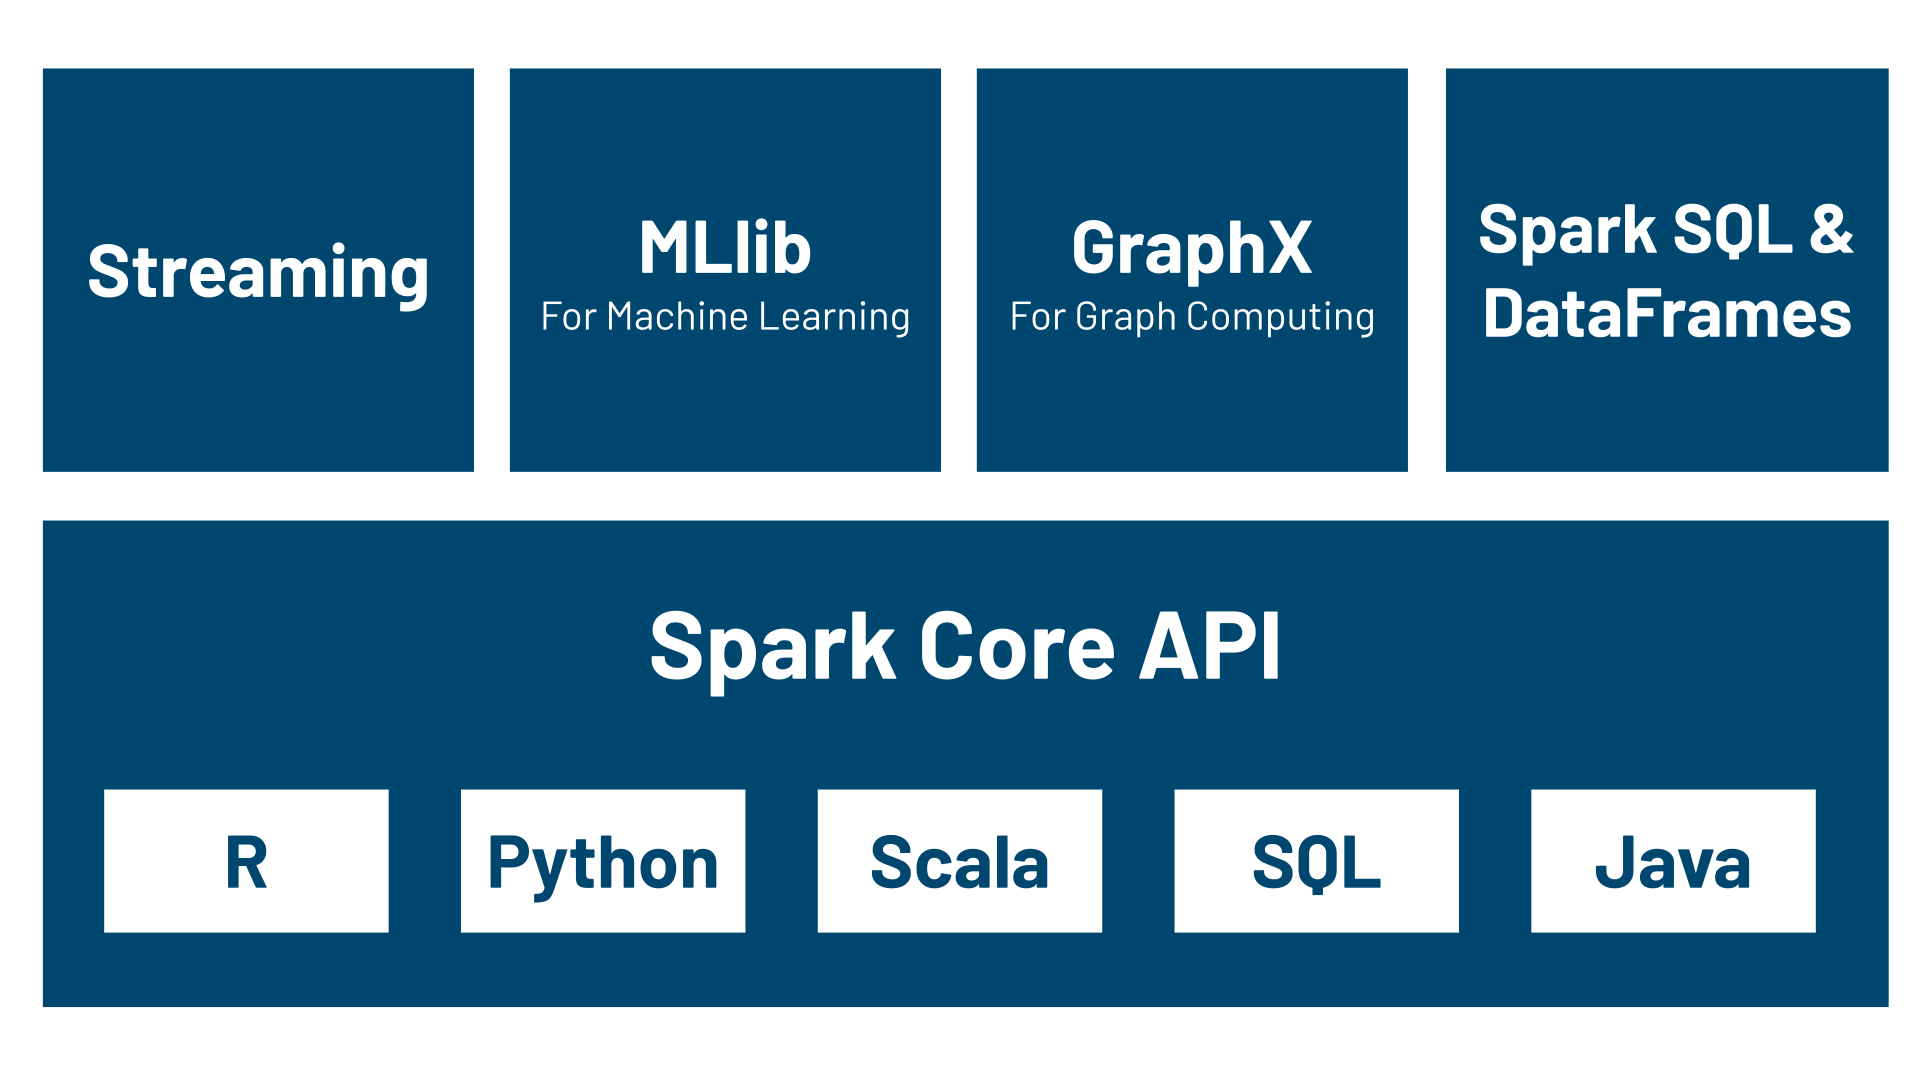

###**Instalação e configuração do Spark**

In [2]:
!pip install pyspark

     |████████████████████████████████| 281.4 MB 36 kB/s 
     |████████████████████████████████| 198 kB 52.1 MB/s 
  Created wheel for pyspark: filename=pyspark-3.2.1-py2.py3-none-any.whl size=281853642 sha256=a00892bb913bcea55cb70016a19dc583b30ec28e9528abec00f7d7d4d5137ef9
  Stored in directory: /root/.cache/pip/wheels/9f/f5/07/7cd8017084dce4e93e84e92efd1e1d5334db05f2e83bcef74f
Successfully built pyspark


In [31]:
from pyspark.sql import SparkSession

In [32]:
spark = SparkSession.builder \
    .master('local[*]') \
    .config('spark.driver.memory', '12g') \
    .appName('ProjetoSpark') \
    .getOrCreate()

In [33]:
spark

###**DataFrame do Spark**

In [ ]:
dados = [('Kimetsu no Yaiba','Ação'),('Dr. Stone','Ficção científica')]
nomeColunas = ['Nome', 'Gênero']

In [ ]:
df = spark.createDataFrame(dados,nomeColunas)

In [ ]:
df.show()

+----------------+-----------------+
|            Nome|           Gênero|
+----------------+-----------------+
|Kimetsu no Yaiba|             Ação|
|       Dr. Stone|Ficção científica|
+----------------+-----------------+



In [ ]:
df.toPandas()

,Nome,Gênero
0,Kimetsu no Yaiba,Ação
1,Dr. Stone,Ficção científica


###**Carregando os nossos dados**

<p align="center"><img src="https://media.giphy.com/media/JRlqKEzTDKci5JPcaL/giphy.gif"</p>


####**Montando nosso drive**

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


####**Carregando os dados: ratings**

In [ ]:
url = '/content/drive/MyDrive/Pyspark/animelist.csv'

In [ ]:
ratings = spark.read.csv(url,inferSchema=True, header=True)

In [ ]:
ratings.show(5)

+-------+--------+------+---------------+----------------+
|user_id|anime_id|rating|watching_status|watched_episodes|
+-------+--------+------+---------------+----------------+
|      0|      67|     9|              1|               1|
|      0|    6702|     7|              1|               4|
|      0|     242|    10|              1|               4|
|      0|    4898|     0|              1|               1|
|      0|      21|    10|              1|               0|
+-------+--------+------+---------------+----------------+
only showing top 5 rows



####**Carregando os dados: animes**

In [7]:
url2 = '/content/drive/MyDrive/Pyspark/anime_with_synopsis.csv'

In [8]:
animes = spark.read.csv(url2, inferSchema=True, header=True, sep=';')

In [ ]:
animes.show(5)

+------+--------------------+-----+--------------------+--------------------+
|MAL_ID|                Name|Score|              Genres|           sypnopsis|
+------+--------------------+-----+--------------------+--------------------+
|     1|        Cowboy Bebop| 8.78|Action, Adventure...|"In the year 2071...|
|     5|Cowboy Bebop: Ten...| 8.39|Action, Drama, My...|other day, anothe...|
|     6|              Trigun| 8.24|Action, Sci-Fi, A...|"Vash the Stamped...|
|     7|  Witch Hunter Robin| 7.27|Action, Mystery, ...|ches are individu...|
|     8|      Bouken Ou Beet| 6.98|Adventure, Fantas...|It is the dark ce...|
+------+--------------------+-----+--------------------+--------------------+
only showing top 5 rows



In [ ]:
animes.show(5, False)

+------+-------------------------------+-----+---------------------------------------------------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|MAL_ID|Name                           |Sco

#**Aula 2 - Operações básicas no Spark**

- Realizar operações básicas nos DataFrames

- Modificar os tipos de dados

- Identificar dados nulos





###**Operações básicas - ratings** 

In [ ]:
ratings.count()

109224747

In [ ]:
ratings.limit(5).toPandas()

,user_id,anime_id,rating,watching_status,watched_episodes
0,0,67,9,1,1
1,0,6702,7,1,4
2,0,242,10,1,4
3,0,4898,0,1,1
4,0,21,10,1,0


In [ ]:
ratings.columns[1]

'anime_id'

In [ ]:
ratings.printSchema()

root
 |-- user_id: integer (nullable = true)
 |-- anime_id: integer (nullable = true)
 |-- rating: integer (nullable = true)
 |-- watching_status: integer (nullable = true)
 |-- watched_episodes: integer (nullable = true)



In [16]:
from pyspark.sql.types import IntegerType, DoubleType, StringType

In [ ]:
ratings = ratings.withColumn('rating', ratings['rating'].cast(DoubleType()))

In [ ]:
ratings.show(5)

+-------+--------+------+---------------+----------------+
|user_id|anime_id|rating|watching_status|watched_episodes|
+-------+--------+------+---------------+----------------+
|      0|      67|   9.0|              1|               1|
|      0|    6702|   7.0|              1|               4|
|      0|     242|  10.0|              1|               4|
|      0|    4898|   0.0|              1|               1|
|      0|      21|  10.0|              1|               0|
+-------+--------+------+---------------+----------------+
only showing top 5 rows



In [ ]:
ratings.printSchema()

root
 |-- user_id: integer (nullable = true)
 |-- anime_id: integer (nullable = true)
 |-- rating: double (nullable = true)
 |-- watching_status: integer (nullable = true)
 |-- watched_episodes: integer (nullable = true)



###**Operações básicas - animes**

In [ ]:
animes.count()

16214

In [ ]:
animes.printSchema()

root
 |-- MAL_ID: integer (nullable = true)
 |-- Name: string (nullable = true)
 |-- Score: string (nullable = true)
 |-- Genres: string (nullable = true)
 |-- sypnopsis: string (nullable = true)



In [9]:
animes.select('Score').distinct().collect()

[Row(Score='8.5'),
 Row(Score='7.16'),
 Row(Score='8.41'),
 Row(Score='4.13'),
 Row(Score='8.2'),
 Row(Score='8.58'),
 Row(Score='7.65'),
 Row(Score='7.3'),
 Row(Score='4.96'),
 Row(Score='5.42'),
 Row(Score='4.33'),
 Row(Score='8.49'),
 Row(Score='5.78'),
 Row(Score='5.45'),
 Row(Score='3.1'),
 Row(Score='2.78'),
 Row(Score='7.47'),
 Row(Score='4.48'),
 Row(Score='4.54'),
 Row(Score='7.35'),
 Row(Score='6.06'),
 Row(Score='8.04'),
 Row(Score='8.3'),
 Row(Score='4.93'),
 Row(Score='3.19'),
 Row(Score='4.44'),
 Row(Score='5.32'),
 Row(Score='4.2'),
 Row(Score='8.76'),
 Row(Score='6.51'),
 Row(Score='7.88'),
 Row(Score='7.91'),
 Row(Score='6.88'),
 Row(Score='4.59'),
 Row(Score='4.71'),
 Row(Score='6.18'),
 Row(Score='7.15'),
 Row(Score='6.81'),
 Row(Score='7.41'),
 Row(Score='4.22'),
 Row(Score='7.48'),
 Row(Score='1.85'),
 Row(Score='3.02'),
 Row(Score='6.54'),
 Row(Score='4.16'),
 Row(Score='3.61'),
 Row(Score='8.32'),
 Row(Score='8.31'),
 Row(Score='7.44'),
 Row(Score='5.94'),
 Row(S

In [10]:
len(animes.select('Score').distinct().collect())

535

In [11]:
animes.where('Score == "Unknown" ').show()

+------+--------------------+-------+--------------------+--------------------+
|MAL_ID|                Name|  Score|              Genres|           sypnopsis|
+------+--------------------+-------+--------------------+--------------------+
|  1547|    Obake no Q-tarou|Unknown|Comedy, School, S...|Q-taro, a monster...|
|  1656|     PostPet Momobin|Unknown|        Comedy, Kids|omo and Komomo ca...|
|  1739|Shibawanko no Wa ...|Unknown|                Kids|"Based on a japan...|
|  1863|Silk Road Shounen...|Unknown|Adventure, Fantas...|hen a boy Yuto vi...|
|  2073|Hengen Taima Yako...|Unknown|      Horror, Shoujo|"Shoko and Maiko ...|
|  2173|Kouchuu Ouja Mush...|Unknown|  Adventure, Fantasy|shadow of Darknes...|
|  2366| Touma Kishinden Oni|Unknown|        Supernatural|Shuramaru is hate...|
|  2636|Dorami-chan: Wow,...|Unknown|             Fantasy|No synopsis has b...|
|  2639|Dorami-chan: Hell...|Unknown|             Fantasy|No synopsis has b...|
|  2642|Dorami-chan: A Bl...|Unknown|   

In [12]:
animes.where('Score == "Unknown" OR Score LIKE " Igi Ari!%" OR Score LIKE  "Yokubatta Inu%"').show()

+------+--------------------+-------+--------------------+--------------------+
|MAL_ID|                Name|  Score|              Genres|           sypnopsis|
+------+--------------------+-------+--------------------+--------------------+
|  1547|    Obake no Q-tarou|Unknown|Comedy, School, S...|Q-taro, a monster...|
|  1656|     PostPet Momobin|Unknown|        Comedy, Kids|omo and Komomo ca...|
|  1739|Shibawanko no Wa ...|Unknown|                Kids|"Based on a japan...|
|  1863|Silk Road Shounen...|Unknown|Adventure, Fantas...|hen a boy Yuto vi...|
|  2073|Hengen Taima Yako...|Unknown|      Horror, Shoujo|"Shoko and Maiko ...|
|  2173|Kouchuu Ouja Mush...|Unknown|  Adventure, Fantasy|shadow of Darknes...|
|  2366| Touma Kishinden Oni|Unknown|        Supernatural|Shuramaru is hate...|
|  2636|Dorami-chan: Wow,...|Unknown|             Fantasy|No synopsis has b...|
|  2639|Dorami-chan: Hell...|Unknown|             Fantasy|No synopsis has b...|
|  2642|Dorami-chan: A Bl...|Unknown|   

In [13]:
animes = animes.where('Score != "Unknown" AND Score NOT LIKE " Igi Ari!%" AND Score NOT LIKE  " Yokubatta Inu%"')

In [14]:
animes.show(5, False)

+------+-------------------------------+-----+---------------------------------------------------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|MAL_ID|Name                           |Sco

In [17]:
animes = animes.withColumn('Score',animes['Score'].cast(DoubleType()))

In [18]:
animes.printSchema()

root
 |-- MAL_ID: integer (nullable = true)
 |-- Name: string (nullable = true)
 |-- Score: double (nullable = true)
 |-- Genres: string (nullable = true)
 |-- sypnopsis: string (nullable = true)



In [19]:
animes = animes.withColumnRenamed('MAL_ID', 'anime_id')

In [20]:
animes.show(5, False)

+--------+-------------------------------+-----+---------------------------------------------------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|anime_id|Name                           

In [21]:
animes = animes.drop('sypnopsis') 

In [22]:
animes.show(5, False)

+--------+-------------------------------+-----+---------------------------------------------------+
|anime_id|Name                           |Score|Genres                                             |
+--------+-------------------------------+-----+---------------------------------------------------+
|1       |Cowboy Bebop                   |8.78 |Action, Adventure, Comedy, Drama, Sci-Fi, Space    |
|5       |Cowboy Bebop: Tengoku no Tobira|8.39 |Action, Drama, Mystery, Sci-Fi, Space              |
|6       |Trigun                         |8.24 |Action, Sci-Fi, Adventure, Comedy, Drama, Shounen  |
|7       |Witch Hunter Robin             |7.27 |Action, Mystery, Police, Supernatural, Drama, Magic|
|8       |Bouken Ou Beet                 |6.98 |Adventure, Fantasy, Shounen, Supernatural          |
+--------+-------------------------------+-----+---------------------------------------------------+
only showing top 5 rows



###**Identificação de dados nulos**

In [23]:
from pyspark.sql import functions as f

In [24]:
animes.select([f.count(f.when(f.isnull(c),1)).alias(c) for c in animes.columns]).show()

+--------+----+-----+------+
|anime_id|Name|Score|Genres|
+--------+----+-----+------+
|       0|   0|    3|     0|
+--------+----+-----+------+



In [25]:
animes = animes.na.drop()

In [26]:
animes.select([f.count(f.when(f.isnull(c),1)).alias(c) for c in animes.columns]).show()

+--------+----+-----+------+
|anime_id|Name|Score|Genres|
+--------+----+-----+------+
|       0|   0|    0|     0|
+--------+----+-----+------+



####**Diferenças entre valores nulos no Spark**

In [ ]:
df = spark.createDataFrame([(1,), (2,), (3,), (None,)], ['data'])
df.toPandas()

,data
0,1.0
1,2.0
2,3.0
3,NaN


In [ ]:
df.show()

+----+
|data|
+----+
|   1|
|   2|
|   3|
|null|
+----+



In [ ]:
df = spark.createDataFrame([(1.,), (2.,), (3.,), (float('nan'),)], ['data'])
df.toPandas()

,data
0,1.0
1,2.0
2,3.0
3,NaN


In [ ]:
df.show()

+----+
|data|
+----+
| 1.0|
| 2.0|
| 3.0|
| NaN|
+----+



In [ ]:
df = spark.createDataFrame([('1',), ('2',), ('3',), (None,)], ['data'])
df.toPandas()

,data
0,1
1,2
2,3
3,None


In [ ]:
df.show()

+----+
|data|
+----+
|   1|
|   2|
|   3|
|null|
+----+



#**Aula 3 - Consultas e Seleções**

- Realizar seleções e consultas com select()

- Ordernar os dados

- Filtrar os dados com where() e filter()

- Utilizar o like()

- Realizar consultas SQL

###**Seleções e consultas com select()**

In [ ]:
animes.select('*').show(5,False)

+--------+-------------------------------+-----+---------------------------------------------------+
|anime_id|Name                           |Score|Genres                                             |
+--------+-------------------------------+-----+---------------------------------------------------+
|1       |Cowboy Bebop                   |8.78 |Action, Adventure, Comedy, Drama, Sci-Fi, Space    |
|5       |Cowboy Bebop: Tengoku no Tobira|8.39 |Action, Drama, Mystery, Sci-Fi, Space              |
|6       |Trigun                         |8.24 |Action, Sci-Fi, Adventure, Comedy, Drama, Shounen  |
|7       |Witch Hunter Robin             |7.27 |Action, Mystery, Police, Supernatural, Drama, Magic|
|8       |Bouken Ou Beet                 |6.98 |Adventure, Fantasy, Shounen, Supernatural          |
+--------+-------------------------------+-----+---------------------------------------------------+
only showing top 5 rows



In [ ]:
animes.select('Name','Genres').show(5,False)

+-------------------------------+---------------------------------------------------+
|Name                           |Genres                                             |
+-------------------------------+---------------------------------------------------+
|Cowboy Bebop                   |Action, Adventure, Comedy, Drama, Sci-Fi, Space    |
|Cowboy Bebop: Tengoku no Tobira|Action, Drama, Mystery, Sci-Fi, Space              |
|Trigun                         |Action, Sci-Fi, Adventure, Comedy, Drama, Shounen  |
|Witch Hunter Robin             |Action, Mystery, Police, Supernatural, Drama, Magic|
|Bouken Ou Beet                 |Adventure, Fantasy, Shounen, Supernatural          |
+-------------------------------+---------------------------------------------------+
only showing top 5 rows



###**Ordenando os dados**

In [ ]:
animes\
  .groupBy('Genres')\
  .count()\
  .orderBy('count',ascending=False)\
  .show(10, False)

+---------------------+-----+
|Genres               |count|
+---------------------+-----+
|Music                |501  |
|Comedy               |371  |
|Dementia             |139  |
|Slice of Life        |107  |
|Fantasy              |105  |
|Slice of Life, Comedy|102  |
|Drama                |73   |
|Comedy, Parody       |64   |
|Adventure            |60   |
|Adventure, Fantasy   |58   |
+---------------------+-----+
only showing top 10 rows



In [ ]:
animes.orderBy('Score',ascending=True).show(10,False)

+--------+----------------------------+-----+-----------------------------+
|anime_id|Name                        |Score|Genres                       |
+--------+----------------------------+-----+-----------------------------+
|3287    |Tenkuu Danzai Skelter+Heaven|1.85 |Sci-Fi, Mecha                |
|13405   |Utsu Musume Sayuri          |2.01 |Comedy, Dementia             |
|38853   |Ex-Arm                      |2.18 |Action, Sci-Fi, Ecchi, Seinen|
|413     |Hametsu no Mars             |2.23 |Sci-Fi, Horror               |
|31634   |Kokuhaku                    |2.3  |Horror                       |
|29949   |Nami                        |2.35 |Dementia                     |
|5877    |Abunai Sisters: Koko & Mika |2.5  |Action, Comedy, Ecchi        |
|32294   |Ai (ONA)                    |2.61 |Romance                      |
|22179   |Aki no Puzzle               |2.63 |Dementia                     |
|32894   |Love Bites                  |2.66 |Horror                       |
+--------+--

In [ ]:
animes.orderBy('Score',ascending=False).show(10,False)

+--------+------------------------------------+-----+-------------------------------------------------------------------+
|anime_id|Name                                |Score|Genres                                                             |
+--------+------------------------------------+-----+-------------------------------------------------------------------+
|5114    |Fullmetal Alchemist: Brotherhood    |9.19 |Action, Military, Adventure, Comedy, Drama, Magic, Fantasy, Shounen|
|40028   |Shingeki no Kyojin: The Final Season|9.17 |Action, Military, Mystery, Super Power, Drama, Fantasy, Shounen    |
|9253    |Steins;Gate                         |9.11 |Thriller, Sci-Fi                                                   |
|11061   |Hunter x Hunter (2011)              |9.1  |Action, Adventure, Fantasy, Shounen, Super Power                   |
|38524   |Shingeki no Kyojin Season 3 Part 2  |9.1  |Action, Drama, Fantasy, Military, Mystery, Shounen, Super Power    |
|28977   |Gintama°      

###**Filtrando os dados com where()**

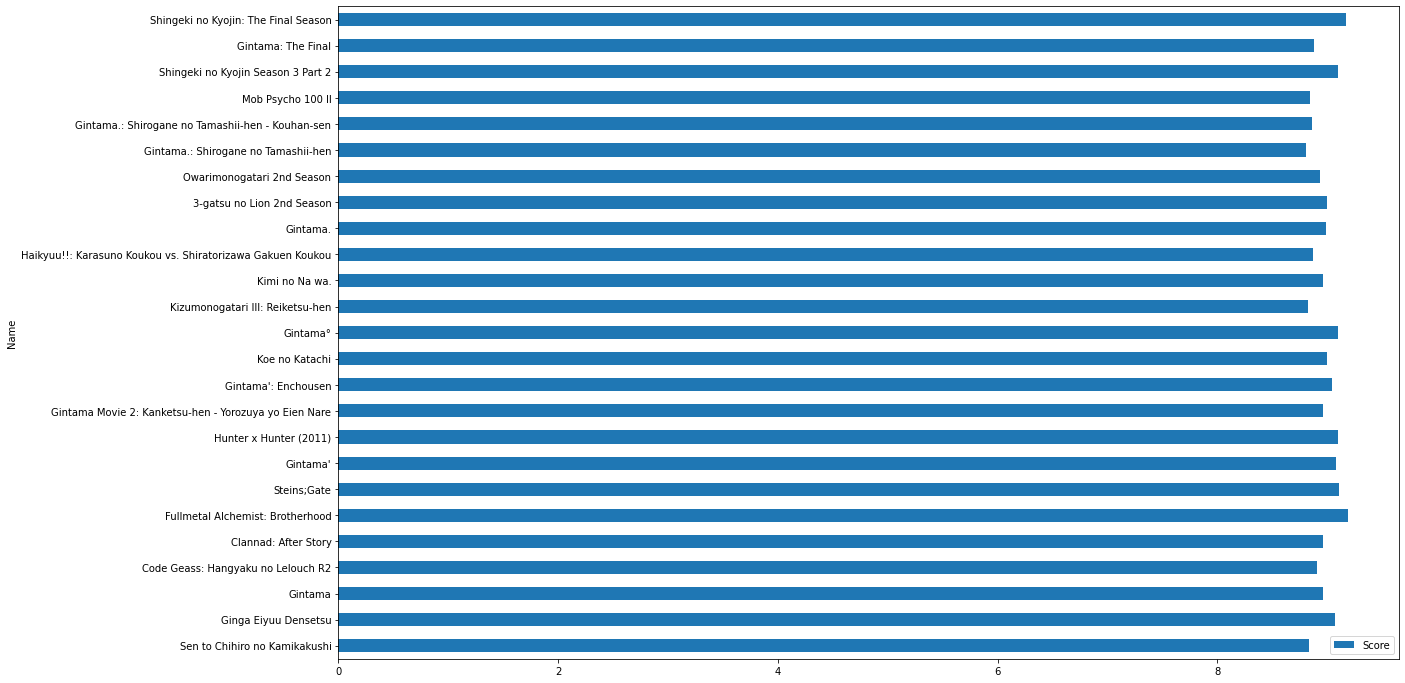

In [ ]:
animes.where('score > 8.80').toPandas().plot.barh(x='Name',y='Score', figsize= (19,12))

In [ ]:
animes.where('score > 8.80').to_pandas_on_spark().plot.barh(y='Name',x='Score')

In [ ]:
animes\
  .where('Name == "Kimetsu no Yaiba"')\
  .show(5, False)

+--------+----------------+-----+-------------------------------------------------+
|anime_id|Name            |Score|Genres                                           |
+--------+----------------+-----+-------------------------------------------------+
|38000   |Kimetsu no Yaiba|8.62 |Action, Demons, Historical, Shounen, Supernatural|
+--------+----------------+-----+-------------------------------------------------+



###**Filtrando os dados com filter()**

In [ ]:
animes\
  .select('Name', 'Score')\
  .filter(animes.Name.startswith('Kimetsu'))\
  .show(5, False)

+----------------------------------------+-----+
|Name                                    |Score|
+----------------------------------------+-----+
|Kimetsu no Yaiba                        |8.62 |
|Kimetsu no Yaiba Movie: Mugen Ressha-hen|8.72 |
|Kimetsu Gakuen: Valentine-hen           |6.59 |
+----------------------------------------+-----+



###**Utilizando like()**

In [ ]:
animes\
  .select('Name', 'Score', 'Genres')\
  .filter((animes['Name']).like('%Season'))\
  .orderBy('Name', ascending=True)\
  .show(15, False)

+----------------------------------------------+-----+-----------------------------------------------------------------+
|Name                                          |Score|Genres                                                           |
+----------------------------------------------+-----+-----------------------------------------------------------------+
|12-sai. 2nd Season                            |6.26 |Romance, School, Shoujo                                          |
|12-sai.: Chicchana Mune no Tokimeki 2nd Season|6.59 |Romance, School, Shoujo                                          |
|3-gatsu no Lion 2nd Season                    |9.0  |Drama, Game, Seinen, Slice of Life                               |
|3D Kanojo: Real Girl 2nd Season               |7.66 |Romance, School, Shoujo                                          |
|7 Seeds 2nd Season                            |7.17 |Sci-Fi, Adventure, Mystery, Psychological, Drama, Romance, Shoujo|
|Aggressive Retsuko (ONA) 2nd Se

In [ ]:
animes\
  .select('Name', 'Score', 'Genres')\
  .filter((animes['Name']).like('%Season%'))\
  .orderBy('Name', ascending=True)\
  .show(20, False)

+----------------------------------------------+-----+-----------------------------------------------------------------+
|Name                                          |Score|Genres                                                           |
+----------------------------------------------+-----+-----------------------------------------------------------------+
|12-sai. 2nd Season                            |6.26 |Romance, School, Shoujo                                          |
|12-sai.: Chicchana Mune no Tokimeki 2nd Season|6.59 |Romance, School, Shoujo                                          |
|3-gatsu no Lion 2nd Season                    |9.0  |Drama, Game, Seinen, Slice of Life                               |
|3D Kanojo: Real Girl 2nd Season               |7.66 |Romance, School, Shoujo                                          |
|7 Seeds 2nd Season                            |7.17 |Sci-Fi, Adventure, Mystery, Psychological, Drama, Romance, Shoujo|
|A3! Season Autumn & Winter     

In [ ]:
animes\
  .select('Name', 'Score', 'Genres')\
  .filter((animes['Name']).like('Season%'))\
  .orderBy('Name', ascending=True)\
  .show(15, False)

+----+-----+------+
|Name|Score|Genres|
+----+-----+------+
+----+-----+------+



###**Consultas SQL**

In [ ]:
animes.createOrReplaceTempView('animeView')

In [ ]:
spark.sql('SELECT * FROM animeView').show(5, False)

+--------+-------------------------------+-----+---------------------------------------------------+
|anime_id|Name                           |Score|Genres                                             |
+--------+-------------------------------+-----+---------------------------------------------------+
|1       |Cowboy Bebop                   |8.78 |Action, Adventure, Comedy, Drama, Sci-Fi, Space    |
|5       |Cowboy Bebop: Tengoku no Tobira|8.39 |Action, Drama, Mystery, Sci-Fi, Space              |
|6       |Trigun                         |8.24 |Action, Sci-Fi, Adventure, Comedy, Drama, Shounen  |
|7       |Witch Hunter Robin             |7.27 |Action, Mystery, Police, Supernatural, Drama, Magic|
|8       |Bouken Ou Beet                 |6.98 |Adventure, Fantasy, Shounen, Supernatural          |
+--------+-------------------------------+-----+---------------------------------------------------+
only showing top 5 rows



In [ ]:
spark\
  .sql('SELECT Name, Score as Nota FROM animeView'
  )\
  .show(5, False)

+-------------------------------+----+
|Name                           |Nota|
+-------------------------------+----+
|Cowboy Bebop                   |8.78|
|Cowboy Bebop: Tengoku no Tobira|8.39|
|Trigun                         |8.24|
|Witch Hunter Robin             |7.27|
|Bouken Ou Beet                 |6.98|
+-------------------------------+----+
only showing top 5 rows

